In [21]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


PROJECT_ROOT = Path(r'C:\Python\projects\CGPAPrediction')

In [14]:
train_data_path = PROJECT_ROOT / 'outputs/learning_data/lstm_attention_train.json'
test_data_path = PROJECT_ROOT / 'outputs/learning_data/lstm_attention_test.json'

In [15]:
import json

with open(train_data_path, mode='r') as f:
    train_data = json.load(f)

with open(test_data_path, mode='r') as f:
    test_data = json.load(f)

In [19]:
train_data = dict(list(train_data.items())[:100])
test_data = dict(list(test_data.items())[:100])

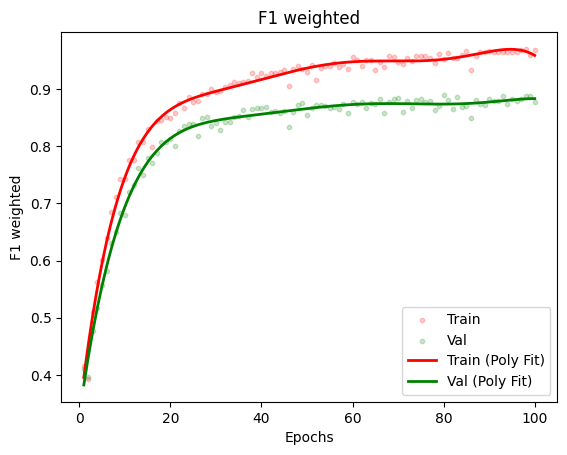

In [32]:
graphs_dir = r'C:\Python\projects\CGPAPrediction\outputs\pics\\'
name = "F1 weighted"

f1_tr = {k: v['f1_weighted'] for k, v in train_data.items()}
f1_tst = {k: v['f1_weighted'] for k, v in test_data.items()}

epochs = np.array(list(f1_tr.keys()), dtype=float)
y_train = np.array(list(f1_tr.values()), dtype=float)
y_test = np.array(list(f1_tst.values()), dtype=float)

poly_train = np.poly1d(np.polyfit(epochs, y_train, deg=6))
poly_test = np.poly1d(np.polyfit(epochs, y_test, deg=6))

x_smooth = np.linspace(epochs.min(), epochs.max(), 200)
y_train_smooth = poly_train(x_smooth)
y_test_smooth = poly_test(x_smooth)

plt.scatter(epochs, y_train, color='r', alpha=0.2, s=10, label="Train")
plt.scatter(epochs, y_test, color='g', alpha=0.2, s=10, label="Val")

plt.plot(x_smooth, y_train_smooth, color='r', linestyle='-', linewidth=2, label="Train (Poly Fit)")
plt.plot(x_smooth, y_test_smooth, color='g', linestyle='-', linewidth=2, label="Val (Poly Fit)")

plt.xlabel('Epochs')
plt.ylabel('F1 weighted')
plt.title(name)

plt.legend()
plt.savefig(graphs_dir + name, dpi=300)
plt.show()

In [29]:
y_test

array([0.40939616, 0.39623694, 0.47699022, 0.51748334, 0.55656209,
       0.58175492, 0.63142084, 0.65043609, 0.68386584, 0.67963468,
       0.71937079, 0.73175121, 0.76252376, 0.74996174, 0.77962307,
       0.77025738, 0.7881989 , 0.80744472, 0.80729585, 0.81325373,
       0.80049332, 0.82641544, 0.83490626, 0.83933371, 0.83852655,
       0.81871911, 0.84868208, 0.8503996 , 0.83496797, 0.8407779 ,
       0.8282656 , 0.84164615, 0.84285921, 0.85113976, 0.85342974,
       0.86286641, 0.85162248, 0.86503505, 0.86744153, 0.86600194,
       0.86926298, 0.86055417, 0.86127051, 0.85818775, 0.86111151,
       0.83292371, 0.85954397, 0.87130384, 0.87621823, 0.85391226,
       0.86663238, 0.87185244, 0.87148598, 0.87105323, 0.8672622 ,
       0.86871947, 0.86533372, 0.87381537, 0.85733133, 0.87648763,
       0.87373295, 0.87818381, 0.86764785, 0.87592657, 0.87401307,
       0.88195713, 0.85868783, 0.87676682, 0.88273712, 0.88477479,
       0.85998902, 0.8791121 , 0.86755389, 0.88098105, 0.88219

In [4]:
def draw_g(data, metric_name):
    x = np.array(list(data.keys()), dtype='int64')
    y = np.array([v[metric_name] for v in data.values()], dtype='float64')

    plt.scatter(x, y, label='Data')
    plt.plot(x, y, label='Line', color='blue')

    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} over epochs')
    plt.legend()
    plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def draw_train_test(train_data, test_data, metrics=['f1_weighted', 'accuracy']):
    metric_titles = {
        'f1_weighted': 'F1-score (weighted)',
        'accuracy': 'Accuracy'
    }
    colors = ['red', 'green', 'orange', 'purple']

    plt.figure(figsize=(8, 5))
    for i, metric in enumerate(metrics):
        title = metric_titles.get(metric, metric)
        x = np.array(list(train_data.keys()), dtype='int64')
        y = np.array([v[metric] for v in train_data.values()], dtype='float64')

        plt.scatter(x, y, s=20, alpha=0.5, color=colors[i], label=title)

        if len(x) > 3:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, color=colors[i])
        else:
            plt.plot(x, y, color=colors[i])

    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Train Metrics over Epochs')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # --- Test ---
    plt.figure(figsize=(8, 5))
    for i, metric in enumerate(metrics):
        title = metric_titles.get(metric, metric)
        x = np.array(list(test_data.keys()), dtype='int64')
        y = np.array([v[metric] for v in test_data.values()], dtype='float64')

        plt.scatter(x, y, s=20, alpha=0.5, color=colors[i], label=title)

        if len(x) > 3:
            x_smooth = np.linspace(x.min(), x.max(), 300)
            spline = make_interp_spline(x, y, k=3)
            y_smooth = spline(x_smooth)
            plt.plot(x_smooth, y_smooth, color=colors[i])
        else:
            plt.plot(x, y, color=colors[i])

    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Test Metrics over Epochs')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

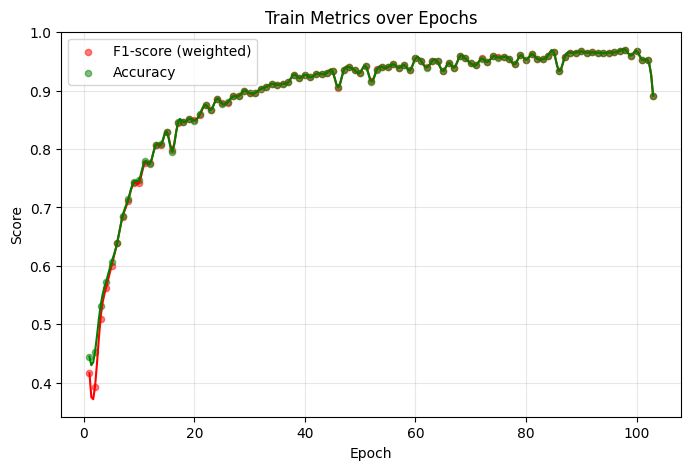

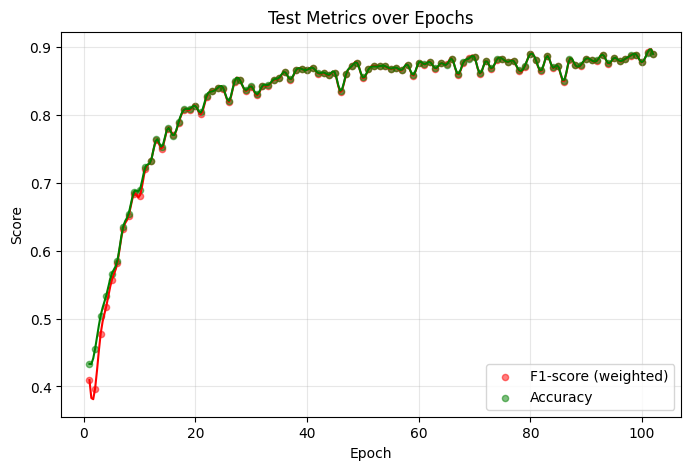

In [12]:
draw_train_test(train_data, test_data)

In [8]:
train_wlst_data_path = PROJECT_ROOT / 'outputs/learning_data/without_lstm_attention_train.json'
test_wlst_data_path = PROJECT_ROOT / 'outputs/learning_data/without_lstm_attention_test.json'

In [9]:
import json

with open(train_wlst_data_path, mode='r') as f:
    train_data_wlstm = json.load(f)

with open(test_wlst_data_path, mode='r') as f:
    test_data_wlstm = json.load(f)

In [10]:
best_lstm_train = max(list(v['f1_weighted'] for v in train_data.values()))
best_lstm_test = max(list(v['f1_weighted'] for v in test_data.values()))

best_wlstm_train = max(list(v['f1_weighted'] for v in train_data_wlstm.values()))
best_wlstm_test = max(list(v['f1_weighted'] for v in test_data_wlstm.values()))

print(best_lstm_train - best_wlstm_train)
print(best_lstm_test - best_wlstm_test)

-0.02111124540429321
0.001974371233066985


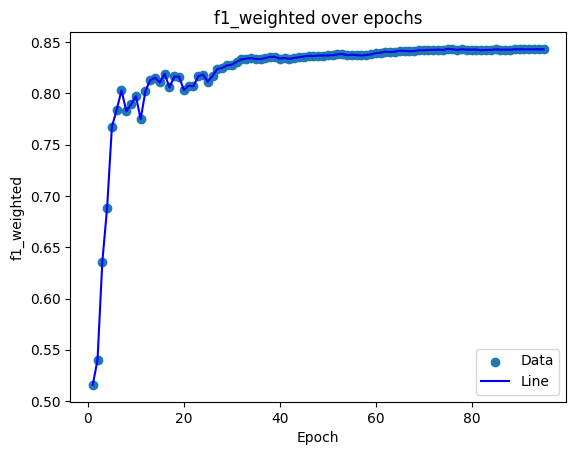

In [11]:
draw_g(test_data_wlstm, 'f1_weighted')

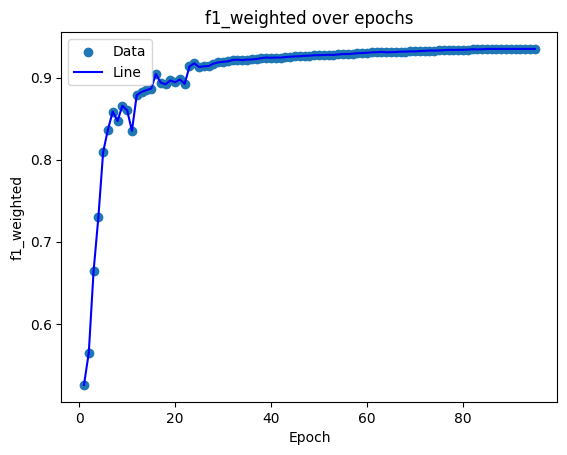

In [12]:
draw_g(train_data_wlstm, 'f1_weighted')

In [15]:
best_lstm_res_test = next(iter([v for v in test_data.values() if v['f1_weighted'] == best_lstm_test]))
best_lstm_res_train = next(iter([v for v in train_data.values() if v['f1_weighted'] == best_lstm_train]))

In [14]:
print(best_lstm_res_test)
print(best_lstm_res_train)

{'model': 'Unnamed', 'accuracy': 0.8443012211668928, 'precision_w': 0.8506439481440292, 'recall_w': 0.8443012211668928, 'precision_per_class': [0.6983758700696056, 0.8945645055664702, 0.8303030303030303], 'recall_per_class': [0.8455056179775281, 0.8209134615384616, 0.8857758620689655], 'f1_macro': 0.826076971906431, 'f1_weighted': 0.8454513267703782}
{'model': 'Unnamed', 'accuracy': 0.9135563231948775, 'precision_w': 0.9195916584284338, 'recall_w': 0.9135563231948775, 'precision_per_class': [0.8063943161634103, 0.96422935297212, 0.8894348894348895], 'recall_per_class': [0.9848156182212582, 0.8699572852396773, 0.956062424969988], 'f1_macro': 0.9076451157076035, 'f1_weighted': 0.9138262784047743}
